In [1]:
! pip3 install neo4j
! pip3 install matplotlib
! pip3 install numpy

In [1]:
from neo4j import GraphDatabase
from insert_data import insert_data
from delete_data import delete_data
from update_data import update_data
import batch_insert
import batch_update
import traversers
from read_data import read_data
import matplotlib.pyplot as plt
import numpy as np

uri = "bolt://localhost:7687"
username = "neo4j"

def get_vertices_number(args, option=True):

    if option:
        assert "node_1" in args.graph_name

        if args.graph_name == "node_10":
            vertices = 10
        elif args.graph_name == "node_100":
            vertices = 100
        elif args.graph_name == "node_1000":
            vertices = 1000
        elif args.graph_name == "node_10000":
            vertices = 10000
        elif args.graph_name == "node_100000":
            vertices = 100000
        elif args.graph_name == "node_1000000":
            vertices = 1000000
        else:
            assert False
    else:
        assert "node_1" in args

        if args == "node_10":
            vertices = 10
        elif args == "node_100":
            vertices = 100
        elif args == "node_1000":
            vertices = 1000
        elif args == "node_10000":
            vertices = 10000
        elif args == "node_100000":
            vertices = 100000
        elif args == "node_1000000":
            vertices = 1000000
        else:
            assert False
    
    return vertices

def mapping(l, key_1, key_2):
    return list(map(lambda x: x[key_1][key_2], l))


databases = ['node_10', 'node_100', 'node_1000', 'node_10000', 'node_100000', 'node_1000000']

In [2]:

import os
my_path = os.path.abspath(".")
print(my_path)

/home/admin1/Documents/uni/last_lambda/neo4j/CompareGraphDatabases/neo4j


In [3]:
def plot(title, x_labels, X_axis, time, option="vertices", database="node_10"):
    plt.figure(figsize=(10,10))
    plt.title(title)

    plt.xticks(X_axis, x_labels) #, rotation=45
    plt.bar(X_axis - 0.4, mapping(time, option, "min"), 0.4, label="min")
    plt.bar(X_axis, mapping(time, option, "mean"), 0.4, label="mean")
    plt.bar(X_axis + 0.4, mapping(time, option, "max"), 0.4, label="max")
    plt.savefig(my_path + "/plots/" + database + "/" + title + ".png")
    plt.legend()


In [4]:
def execute_database(database, large=True, config=True):
    password = database + database
    driver = GraphDatabase.driver(uri, auth=(username, password))
    if config:
        with driver.session() as session:
            # session.run("CREATE FULLTEXT INDEX PersonName FOR (n:Person) ON EACH [n.name]")
            session.run("CREATE CONSTRAINT name_unique FOR (n:Person) REQUIRE n.name IS UNIQUE")


    
    vertices = get_vertices_number(database, False)

    file = open(database + ".txt", 'r')
    lines = file.readlines()[2:]
    time = []

    if not large:
        print("insert_all_data")
        time.append(insert_data.insert_all_data(lines=lines, driver=driver))
        print("update_all_data")
        time.append(update_data.update_all_data(n=vertices, driver=driver))
        print("batch_update")
        time.append(batch_update.batch_update(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
        print("read_all_data")
        time.append(read_data.read_all_data(n=vertices, driver=driver))
        print("delete_k_vertices_and_edges")
        time.append(delete_data.delete_k_vertices_and_edges(k=vertices, driver=driver))
        print("batch_insert")
        time.append(batch_insert.batch_insert(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
            
        x_labels = ["insert", "update", "batch_upd", "read", "delete", "batch_insert"]
    else:
        print("batch_insert")
        time.append(batch_insert.batch_insert(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
        print("batch_update")
        time.append(batch_update.batch_update(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
        print("read_all_data")
        time.append(read_data.read_all_data(n=100, driver=driver))
        print("delete_k_vertices_and_edges")
        time.append(delete_data.delete_k_vertices_and_edges(k=100, driver=driver))
        
        x_labels = ["batch_insert", "batch_update", "read", "delete"]

    X_axis = np.arange(len(x_labels))*2

    plot("Basic sequence on " + database + ": Vertices", x_labels, X_axis, time, "vertices", database)
    plot("Basic sequence on " + database + ": Edges", x_labels, X_axis, time, "edges", database)

    if not large:
        x_labels = ["insert", "batch insert"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[0], time[5]]
        plot("Insert times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Insert times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["update", "batch_upd"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[1], time[2]]
        plot("Update times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Update times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)
    
    plt.show()
    if not large:
        return {
            "insert": time[0],
            "update": time[1],
            "batch_update": time[2],
            "read": time[3],
            "delete": time[4],
            "batch_insert": time[5],
        }
    else:
        return {
            "batch insert": time[0],
            "batch update": time[1],
            "read": time[2],
            "delete": time[3],
        }

In [39]:
uri = "bolt://localhost:7690"

insert_all_data


tqdm() Progress Bar: 100%|██████████| 30/30 [00:01<00:00, 21.18it/s]


update_all_data


tqdm() Progress Bar: 100%|██████████| 10/10 [00:00<00:00, 18.69it/s]


batch_update


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


read_all_data


tqdm() Progress Bar: 100%|██████████| 10/10 [00:00<00:00, 27.71it/s]


delete_k_vertices_and_edges


tqdm() Progress Bar: 100%|██████████| 10/10 [00:00<00:00, 14.59it/s]


batch_insert


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


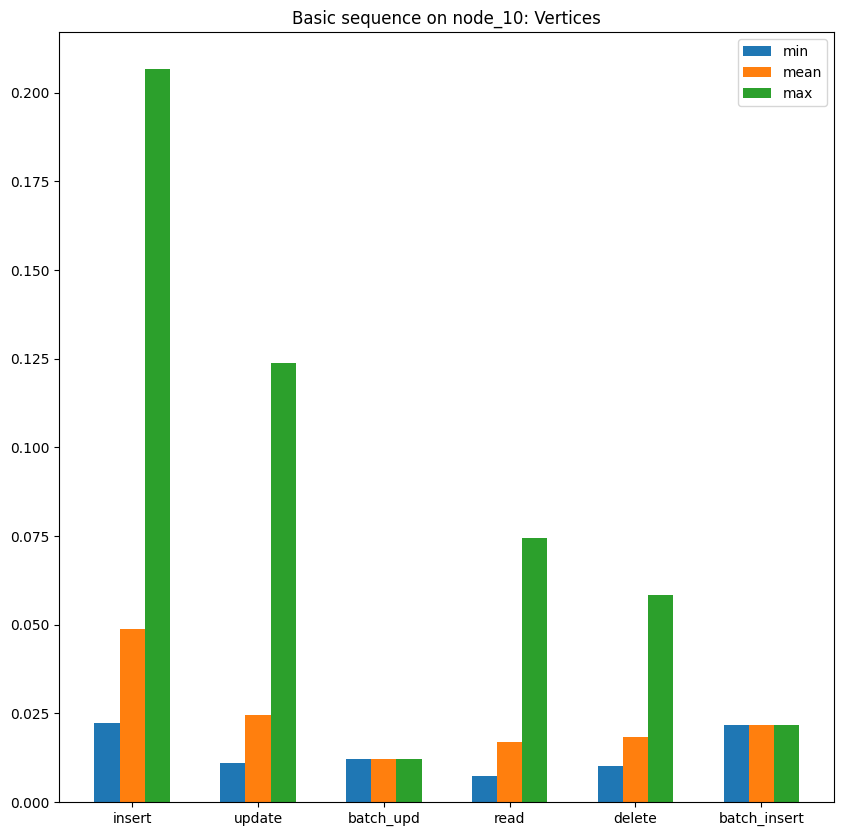

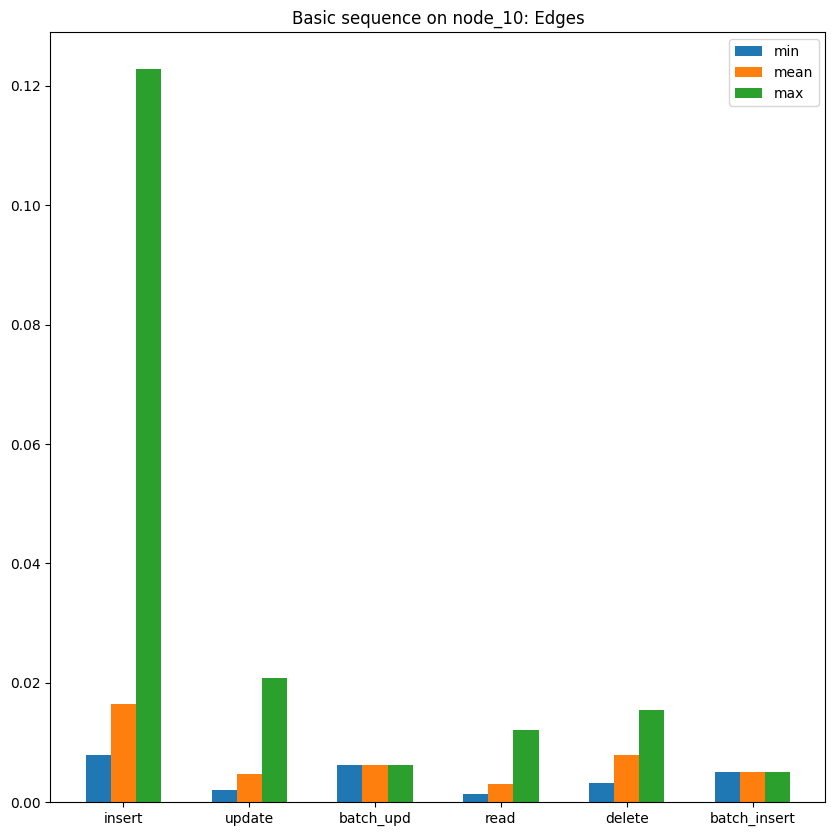

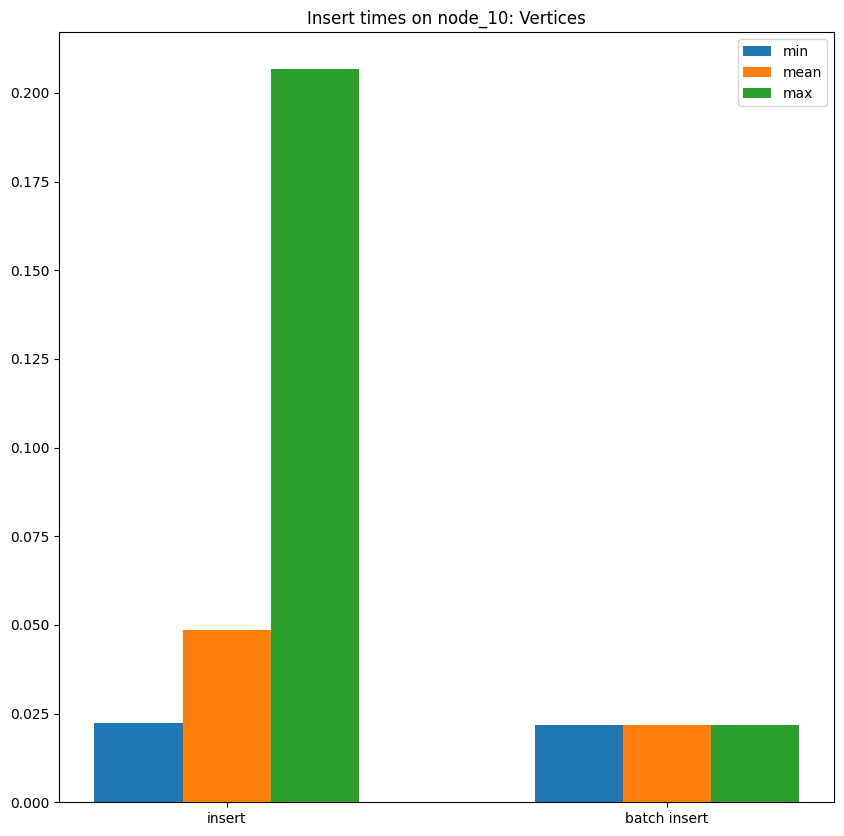

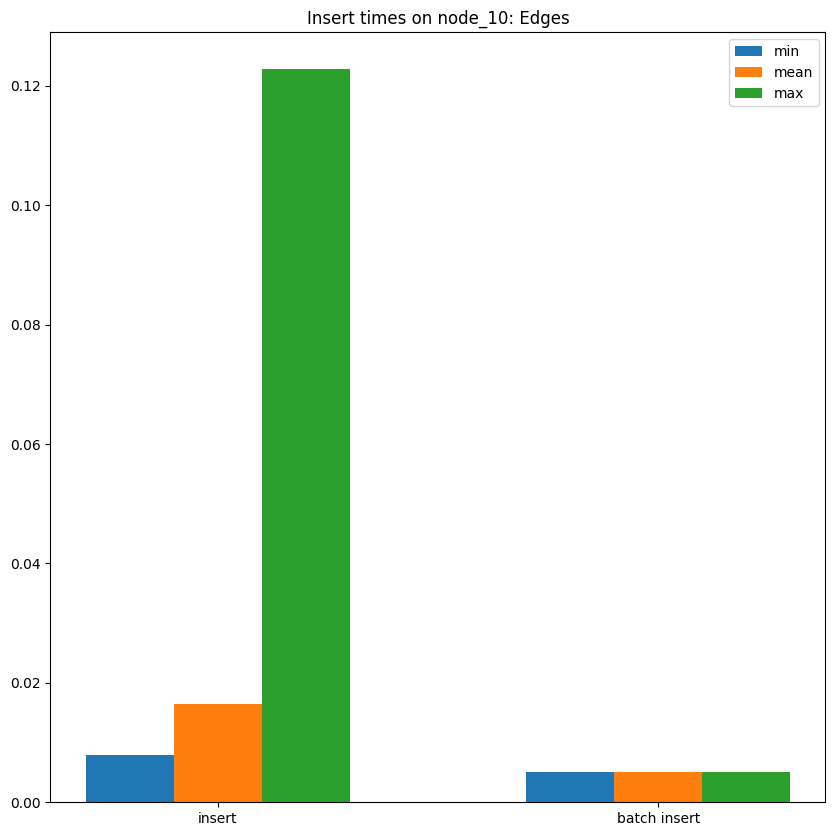

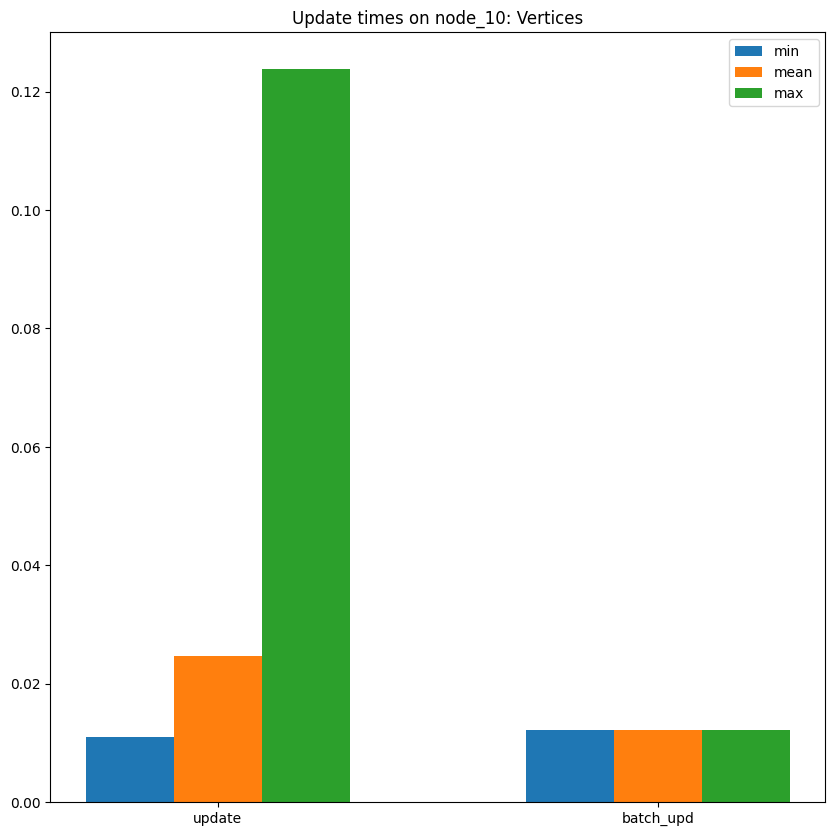

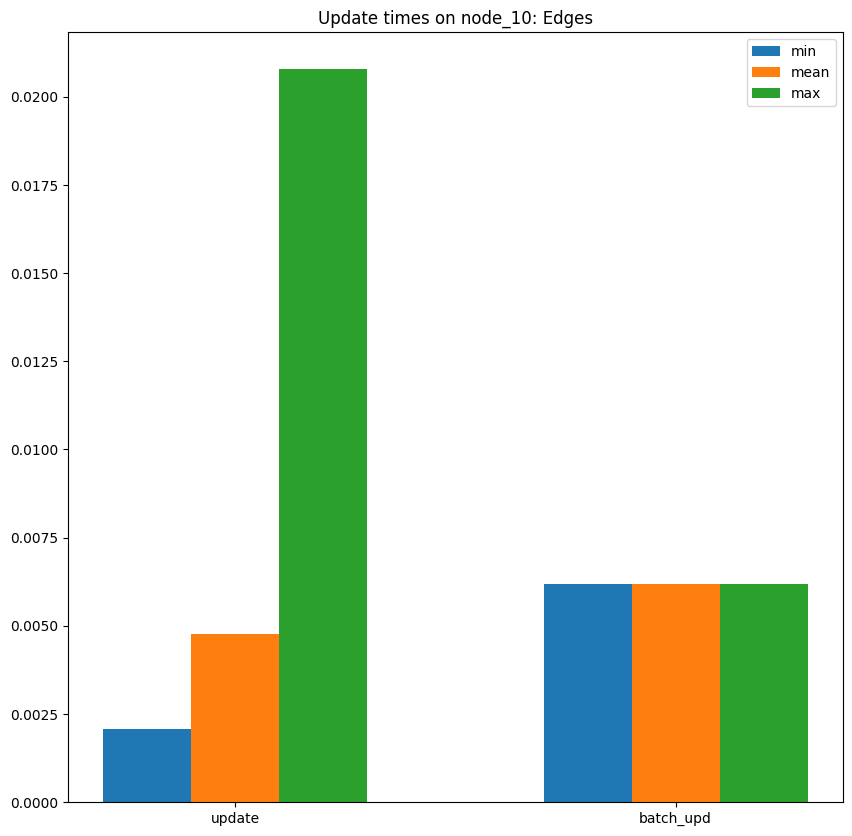

db: node_10
{'insert': {'edges': {'min': 0.0079728364944458, 'max': 0.12283492088317871, 'mean': 0.016424877302987233, 'total_time': 0.9197931289672852}, 'vertices': {'min': 0.022213459014892578, 'max': 0.20675015449523926, 'mean': 0.04869911670684814, 'total_time': 0.48699116706848145}}, 'update': {'edges': {'min': 0.0020873149236043296, 'max': 0.02078979355948312, 'mean': 0.004760861396789551, 'total_time': 0.28565168380737305}, 'vertices': {'min': 0.011010169982910156, 'max': 0.12384533882141113, 'mean': 0.02460017204284668, 'total_time': 0.2460017204284668}}, 'batch_update': {'vertices': {'min': 0.012246942520141602, 'max': 0.012246942520141602, 'mean': 0.012246942520141602, 'total_time': 0.12246942520141602}, 'edges': {'min': 0.006198092301686605, 'max': 0.006198092301686605, 'mean': 0.006198092301686605, 'total_time': 0.3718855381011963}}, 'read': {'edges': {'min': 0.0014314651489257812, 'max': 0.012034348079136439, 'mean': 0.00312042236328125, 'total_time': 0.187225341796875}, '

In [44]:
results = {}
results["node_10"] = execute_database("node_10", large=False, config=False)
print("db:", "node_10")
print(results["node_10"])

In [47]:
uri = "bolt://localhost:7687"

insert_all_data


tqdm() Progress Bar: 100%|██████████| 600/600 [00:10<00:00, 58.11it/s] 


update_all_data


tqdm() Progress Bar: 100%|██████████| 100/100 [00:02<00:00, 47.83it/s]


batch_update


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


read_all_data


tqdm() Progress Bar: 100%|██████████| 100/100 [00:01<00:00, 65.23it/s]


delete_k_vertices_and_edges


tqdm() Progress Bar: 100%|██████████| 100/100 [00:03<00:00, 29.55it/s]


batch_insert


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


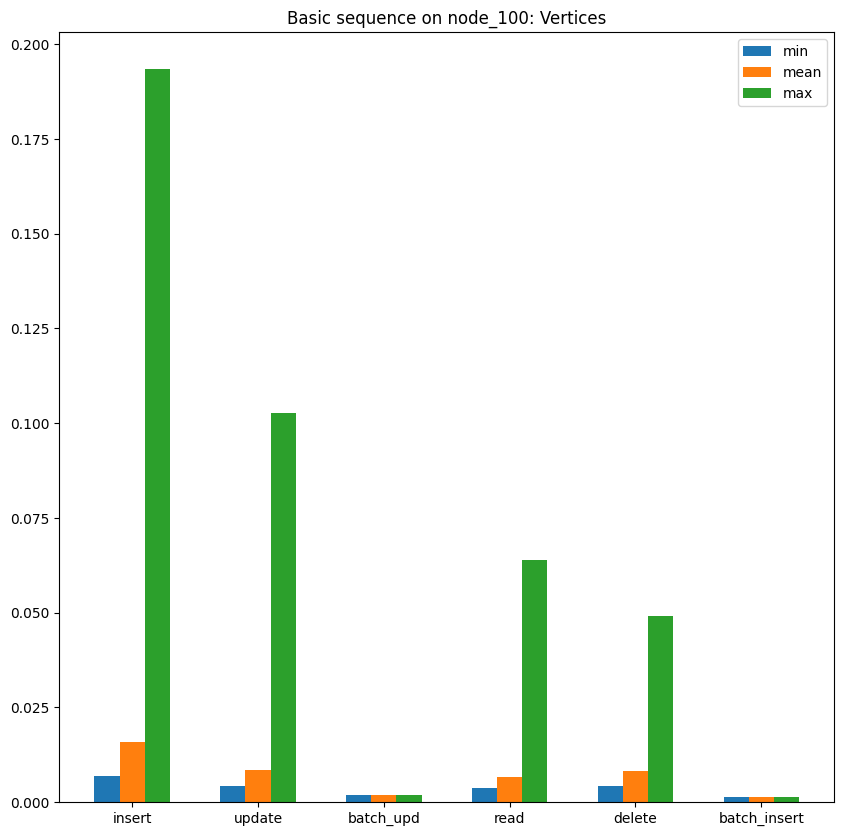

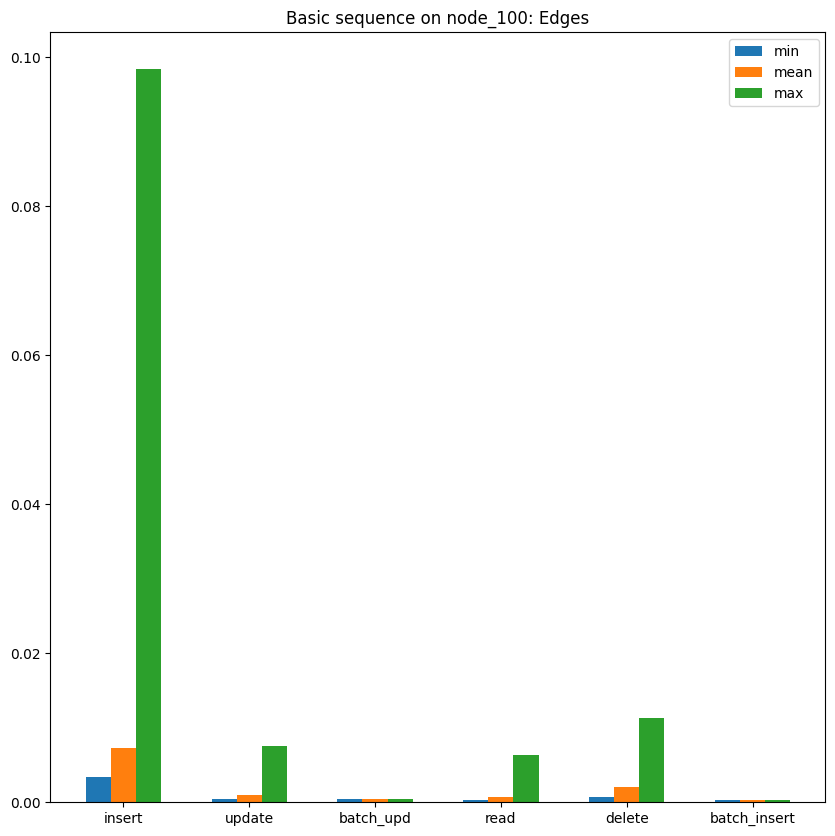

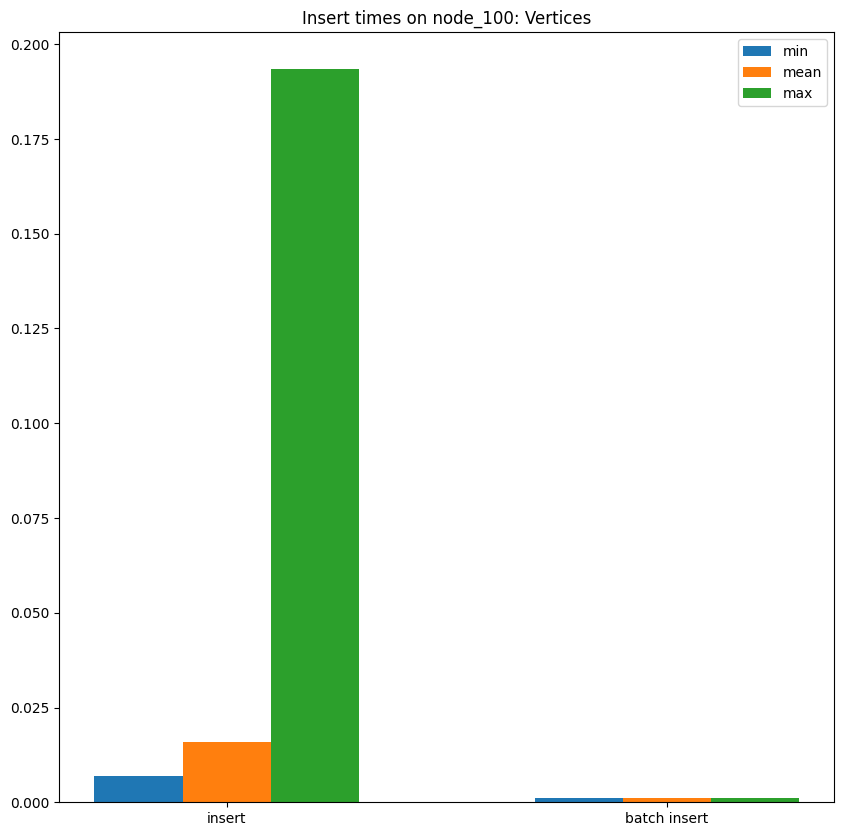

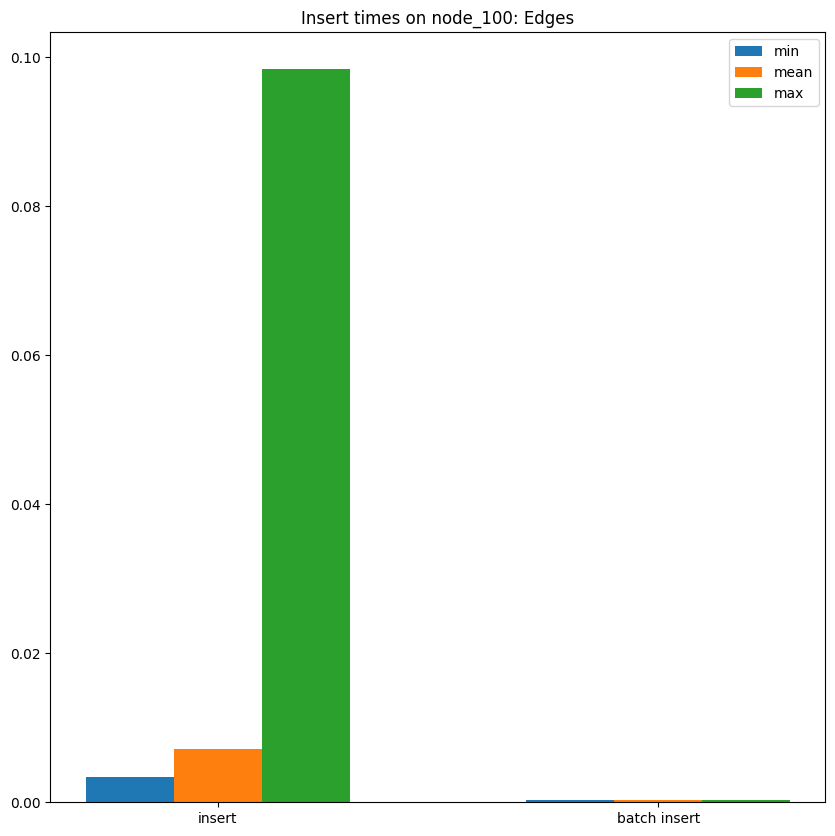

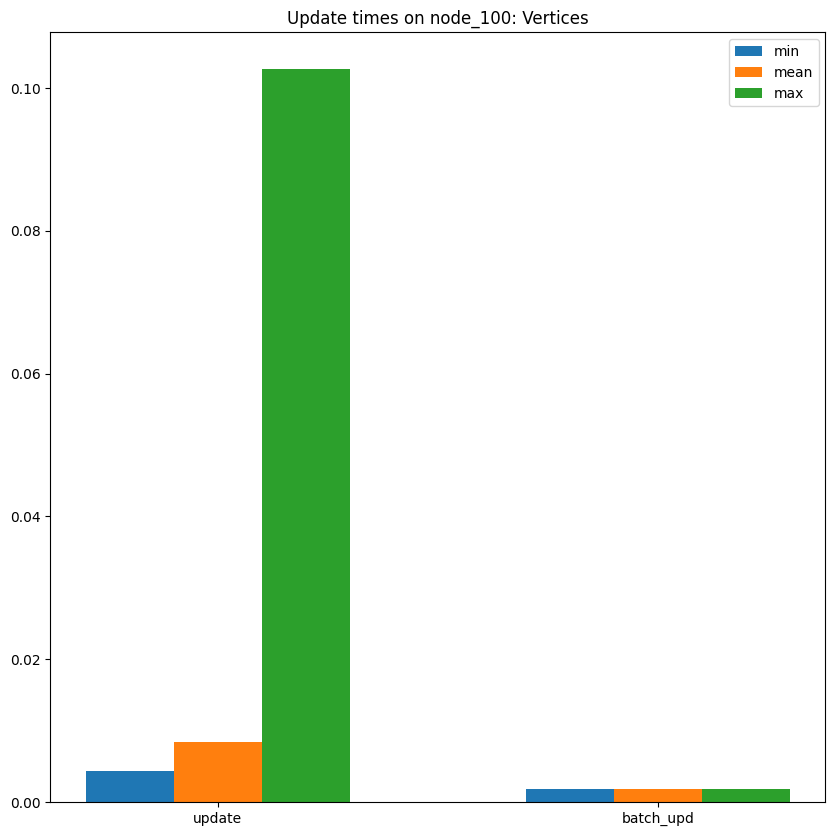

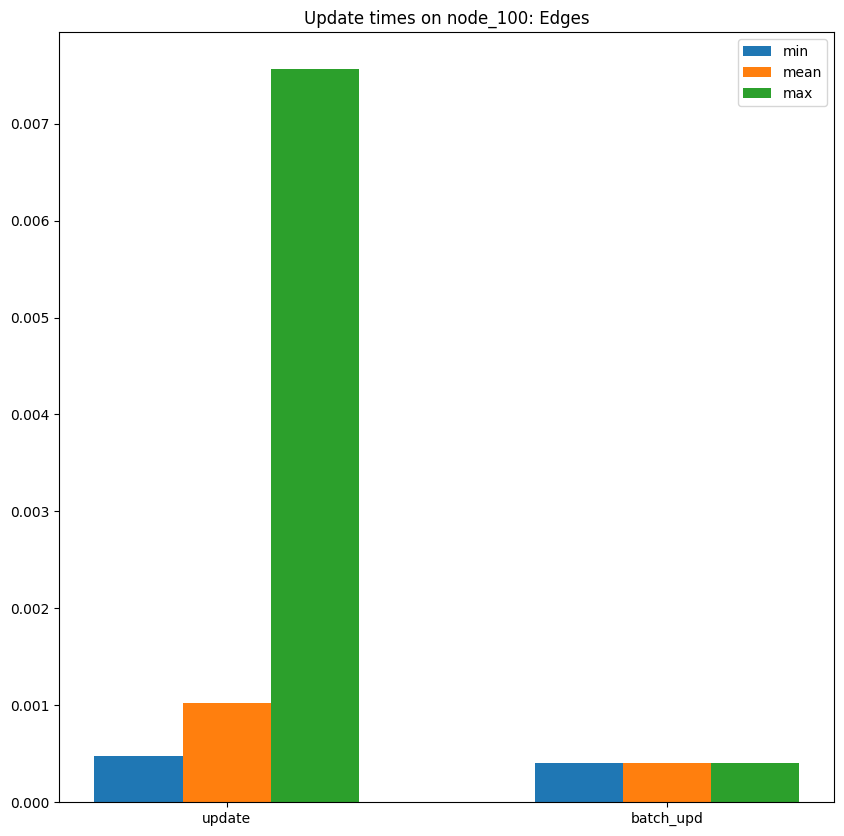

db: node_100
{'insert': {'edges': {'min': 0.003340601921081543, 'max': 0.0984269380569458, 'mean': 0.007203716697501498, 'total_time': 8.615645170211792}, 'vertices': {'min': 0.006844282150268555, 'max': 0.19347429275512695, 'mean': 0.015861873626708985, 'total_time': 1.5861873626708984}}, 'update': {'edges': {'min': 0.0004743337631225586, 'max': 0.007566011868990385, 'mean': 0.0010194013516108195, 'total_time': 1.2232816219329834}, 'vertices': {'min': 0.004338502883911133, 'max': 0.1026756763458252, 'mean': 0.00843815565109253, 'total_time': 0.8438155651092529}}, 'batch_update': {'vertices': {'min': 0.0018343758583068848, 'max': 0.0018343758583068848, 'mean': 0.0018343758583068848, 'total_time': 0.18343758583068848}, 'edges': {'min': 0.0004020919402440389, 'max': 0.0004020919402440389, 'mean': 0.0004020919402440389, 'total_time': 0.4825103282928467}}, 'read': {'edges': {'min': 0.0003492699729071723, 'max': 0.006354056871854342, 'mean': 0.0007045578956604004, 'total_time': 0.8454694747

In [50]:
results["node_100"] = execute_database("node_100", large=False, config=False)
print("db:", "node_100")
print(results["node_100"])

insert_all_data


tqdm() Progress Bar: 100%|██████████| 59587/59587 [09:28<00:00, 104.85it/s]


update_all_data


tqdm() Progress Bar: 100%|██████████| 1000/1000 [00:39<00:00, 25.02it/s]


batch_update


tqdm() Progress Bar: 100%|██████████| 60/60 [00:10<00:00,  5.76it/s]


read_all_data


tqdm() Progress Bar: 100%|██████████| 1000/1000 [00:19<00:00, 51.93it/s]


delete_k_vertices_and_edges


tqdm() Progress Bar: 100%|██████████| 1000/1000 [00:41<00:00, 24.01it/s]


batch_insert


tqdm() Progress Bar: 100%|██████████| 60/60 [00:08<00:00,  7.25it/s]


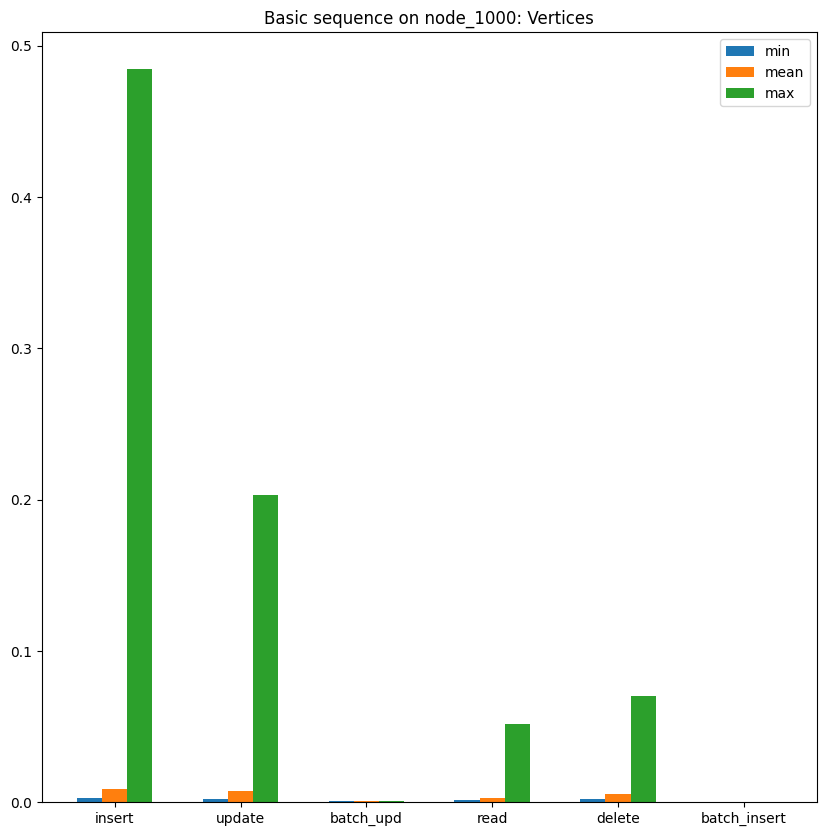

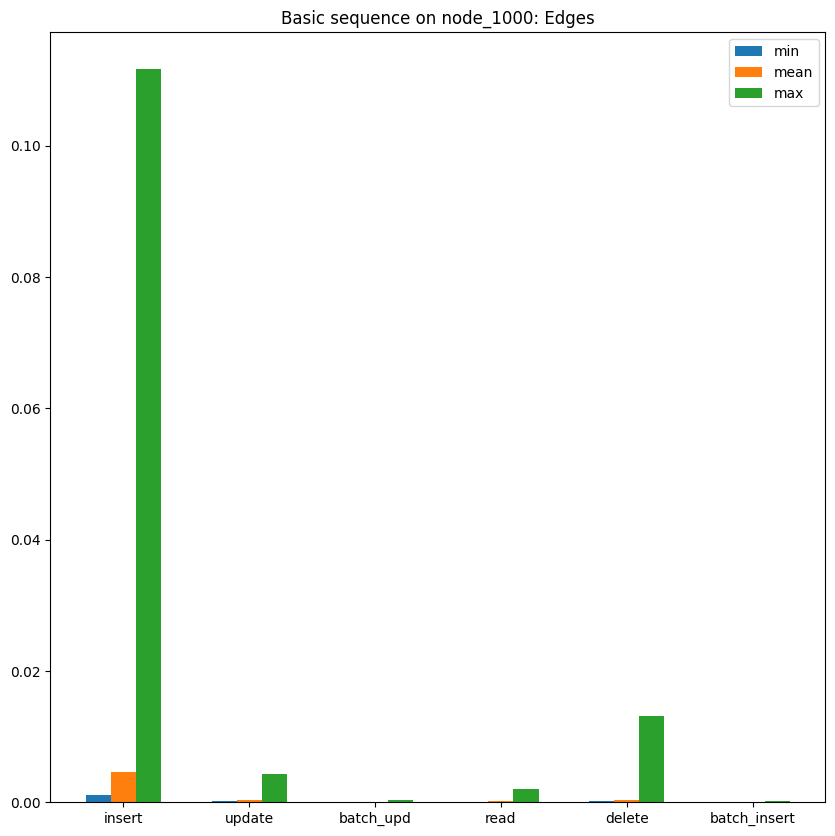

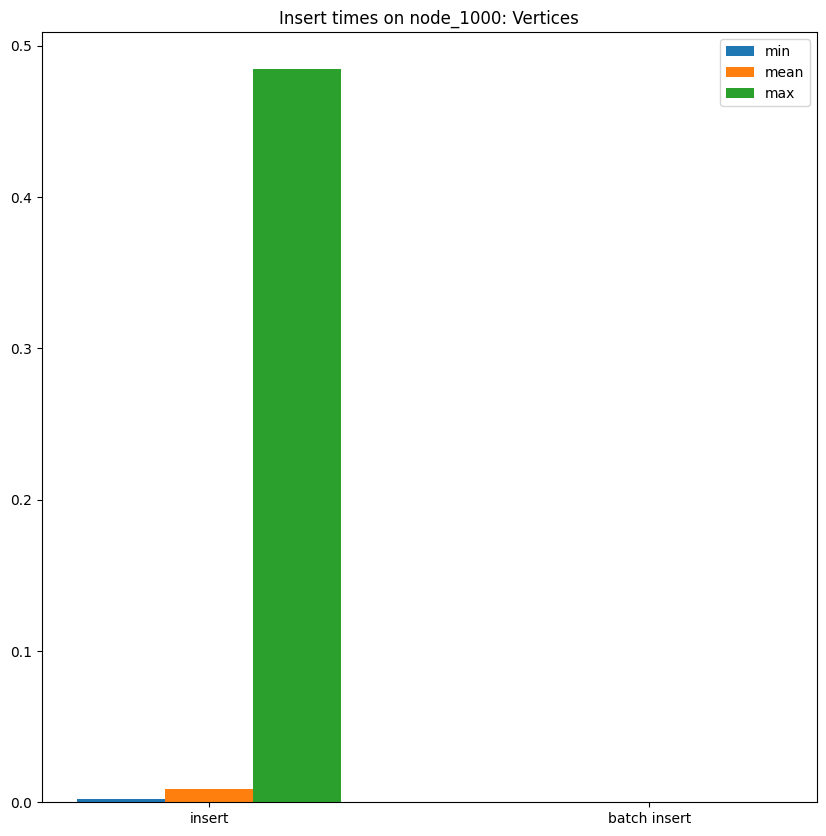

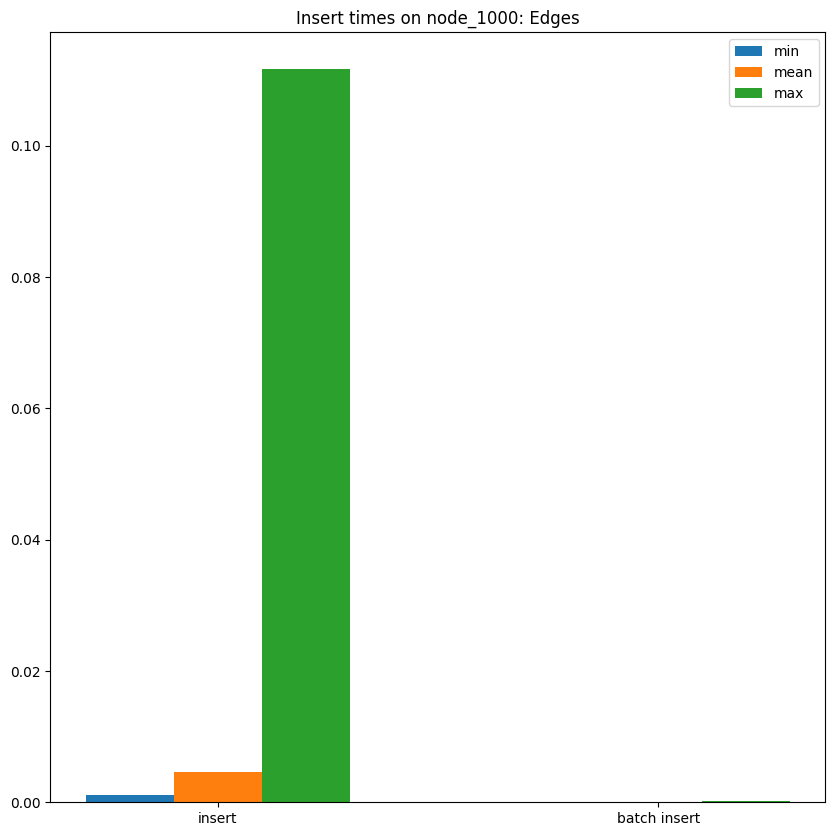

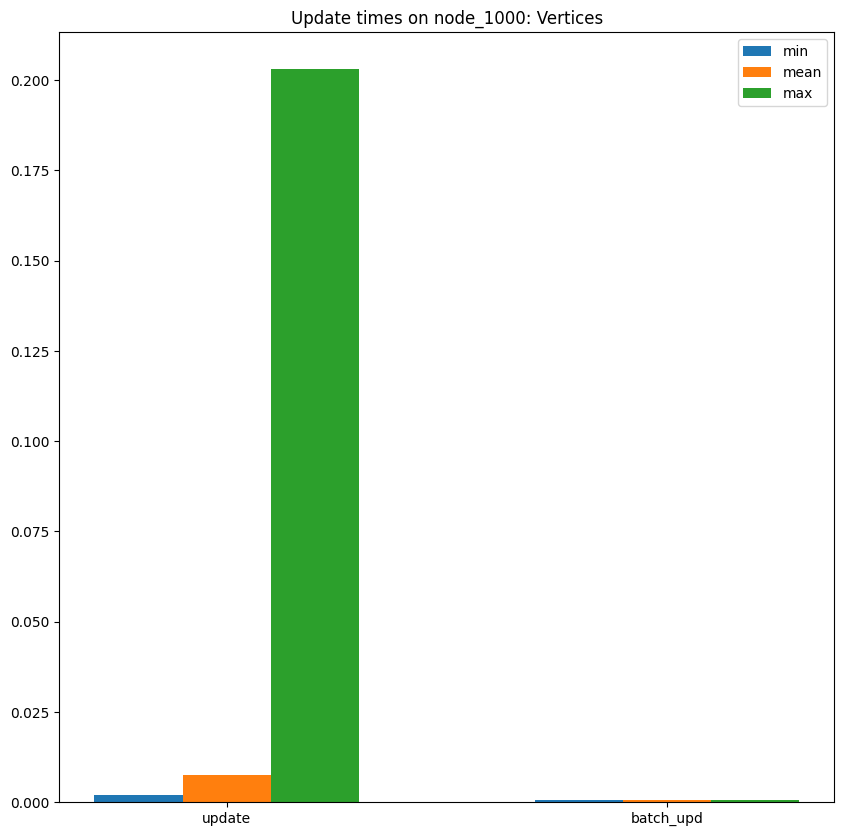

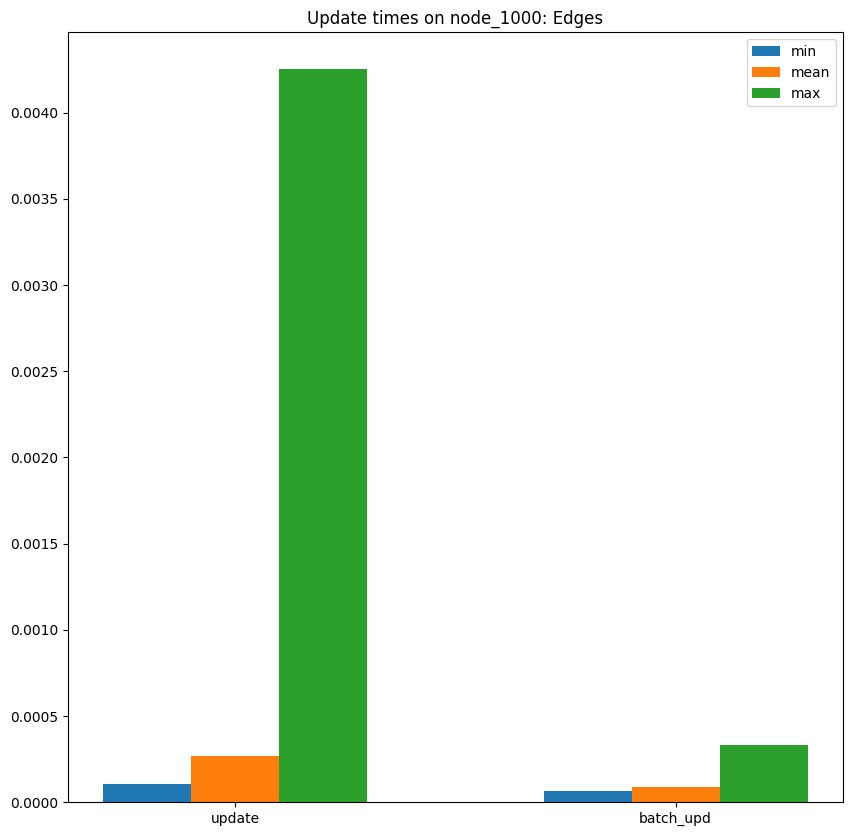

db: node_1000
{'insert': {'edges': {'min': 0.001141667366027832, 'max': 0.11169052124023438, 'mean': 0.0046058942239896915, 'total_time': 548.8844146728516}, 'vertices': {'min': 0.002485036849975586, 'max': 0.48477792739868164, 'mean': 0.008466994488513195, 'total_time': 8.475461483001709}}, 'update': {'edges': {'min': 0.00010581858017865349, 'max': 0.004253689123659718, 'mean': 0.00026910805816467257, 'total_time': 32.06395602226257}, 'vertices': {'min': 0.0020210742950439453, 'max': 0.2031257152557373, 'mean': 0.007461418628692627, 'total_time': 7.461418628692627}}, 'batch_update': {'vertices': {'min': 0.0006130623817443847, 'max': 0.0006130623817443847, 'mean': 0.0006130623817443847, 'total_time': 0.6130623817443848}, 'edges': {'min': 6.681764125823974e-05, 'max': 0.00033291077613830565, 'mean': 8.570615160988796e-05, 'total_time': 10.213944911956787}}, 'read': {'edges': {'min': 8.869920886537564e-05, 'max': 0.0019646080172791773, 'mean': 0.0001346918757976796, 'total_time': 16.0484

In [52]:
results["node_1000"] = execute_database("node_1000", large=False, config=False)
print("db:", "node_1000")
print(results["node_1000"])

batch_insert


tqdm() Progress Bar: 100%|██████████| 363/363 [01:26<00:00,  4.22it/s]


batch_update


tqdm() Progress Bar: 100%|██████████| 363/363 [00:51<00:00,  7.11it/s]


read_all_data


tqdm() Progress Bar: 100%|██████████| 100/100 [00:01<00:00, 66.76it/s]


delete_k_vertices_and_edges


tqdm() Progress Bar: 100%|██████████| 100/100 [00:03<00:00, 26.50it/s]


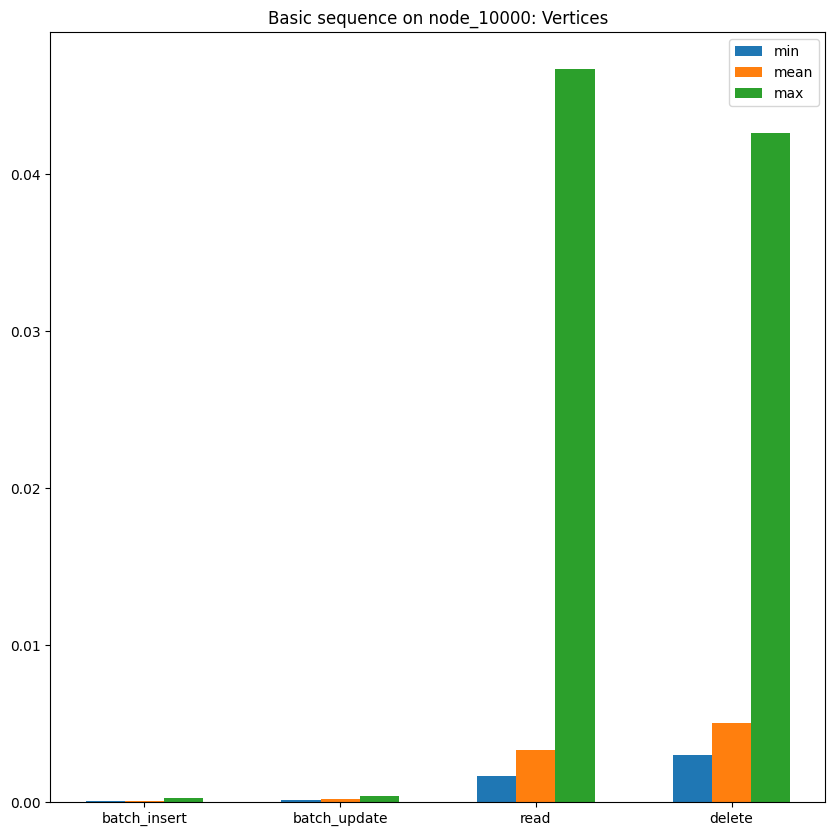

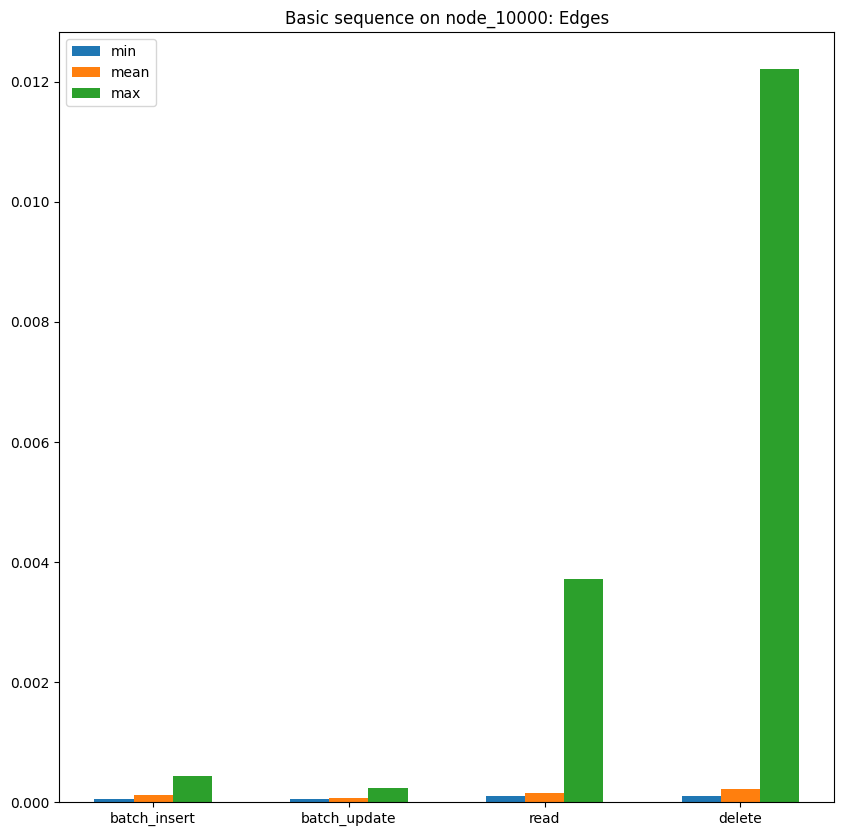

db: node_10000
{'batch insert': {'vertices': {'min': 6.513357162475586e-05, 'max': 0.0002483525276184082, 'mean': 0.0001030479907989502, 'total_time': 1.030479907989502}, 'edges': {'min': 5.857920646667481e-05, 'max': 0.00043884027004241944, 'mean': 0.0001111884354722485, 'total_time': 80.6987874507904}}, 'batch update': {'vertices': {'min': 0.0001393430233001709, 'max': 0.00039429426193237304, 'mean': 0.00017462685108184814, 'total_time': 1.7462685108184814}, 'edges': {'min': 5.742406845092774e-05, 'max': 0.0002341557741165161, 'mean': 6.868946242568714e-05, 'total_time': 49.85371279716492}}, 'read': {'edges': {'min': 0.00010487413781834399, 'max': 0.003713369369506836, 'mean': 0.00015903097290131553, 'total_time': 1.1544058322906494}, 'vertices': {'min': 0.00167083740234375, 'max': 0.046712636947631836, 'mean': 0.003299715518951416, 'total_time': 0.3299715518951416}}, 'delete': {'edges': {'min': 0.00010762882232666016, 'max': 0.012211799621582031, 'mean': 0.00022390447711548864, 'tot

In [52]:
results["node_10000"] = execute_database("node_10000", large=True)
print("db:", "node_10000")
print(results["node_10000"])

batch_insert


tqdm() Progress Bar: 100%|██████████| 1415/1415 [03:05<00:00,  7.62it/s]


batch_update


tqdm() Progress Bar: 100%|██████████| 1415/1415 [02:51<00:00,  8.23it/s]


read_all_data


tqdm() Progress Bar: 100%|██████████| 100/100 [00:01<00:00, 51.10it/s]


delete_k_vertices_and_edges


tqdm() Progress Bar: 100%|██████████| 100/100 [00:04<00:00, 23.78it/s]


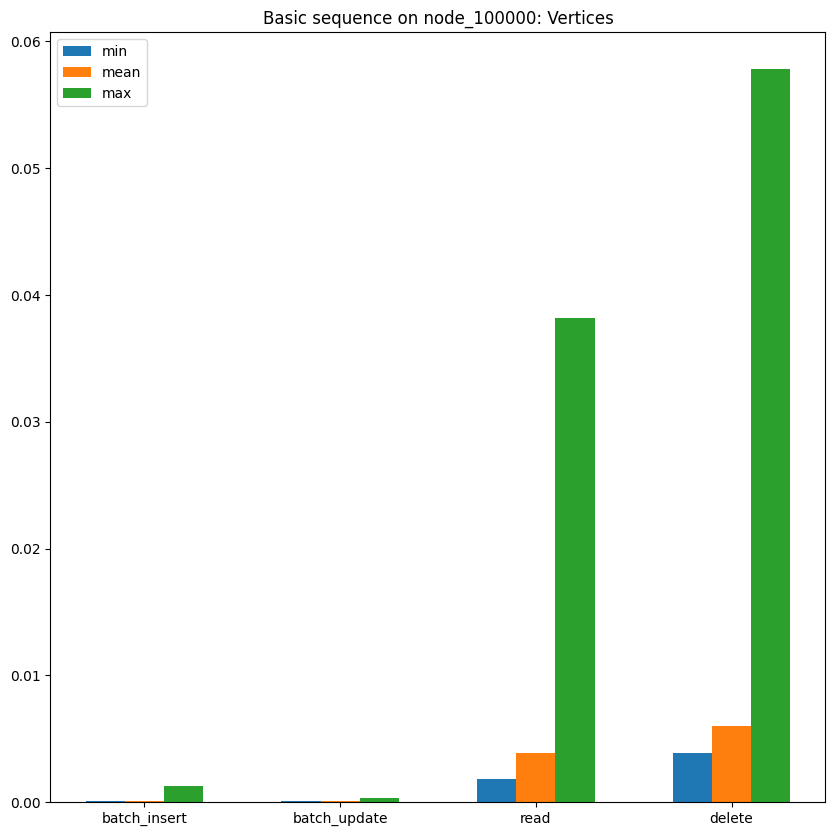

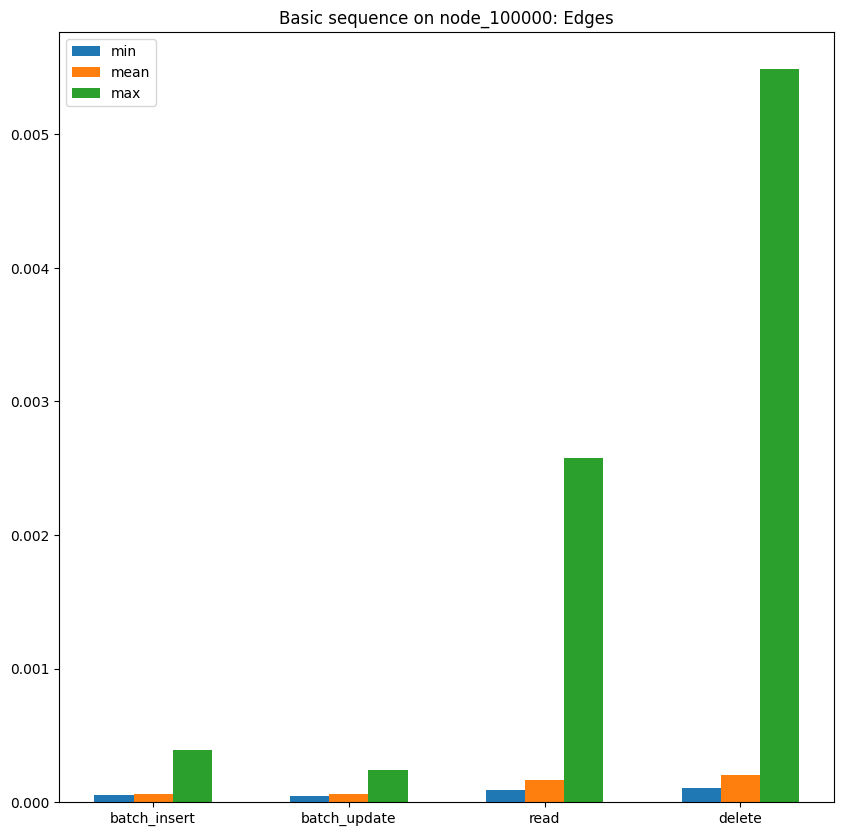

db: node_100000
{'batch insert': {'vertices': {'min': 6.853199005126954e-05, 'max': 0.0012811260223388671, 'mean': 0.00011940733909606933, 'total_time': 11.940733909606934}, 'edges': {'min': 5.2569389343261716e-05, 'max': 0.00039249539375305173, 'mean': 6.4112498979137e-05, 'total_time': 181.3463065624237}}, 'batch update': {'vertices': {'min': 9.824514389038086e-05, 'max': 0.0003622310161590576, 'mean': 0.0001248445749282837, 'total_time': 12.48445749282837}, 'edges': {'min': 4.873192310333252e-05, 'max': 0.00024272489547729492, 'mean': 5.917673091298832e-05, 'total_time': 167.3851706981659}}, 'read': {'edges': {'min': 8.960791996547154e-05, 'max': 0.0025751590728759766, 'mean': 0.00016700577853853715, 'total_time': 1.5528197288513184}, 'vertices': {'min': 0.0017883777618408203, 'max': 0.03822445869445801, 'mean': 0.003866381645202637, 'total_time': 0.38663816452026367}}, 'delete': {'edges': {'min': 0.00010546806186663627, 'max': 0.005490303039550781, 'mean': 0.00020001313034534828, '

In [10]:
results = {}

results["node_100000"] = execute_database("node_100000", large=True, config=False)
print("db:", "node_100000")
print(results["node_100000"])

batch_insert


tqdm() Progress Bar: 100%|██████████| 23668/23668 [55:34<00:00,  7.10it/s]  


batch_update


tqdm() Progress Bar: 100%|██████████| 23668/23668 [1:27:27<00:00,  4.51it/s]  


read_all_data


tqdm() Progress Bar: 100%|██████████| 100/100 [00:02<00:00, 48.86it/s]


delete_k_vertices_and_edges


tqdm() Progress Bar: 100%|██████████| 100/100 [00:04<00:00, 21.15it/s]


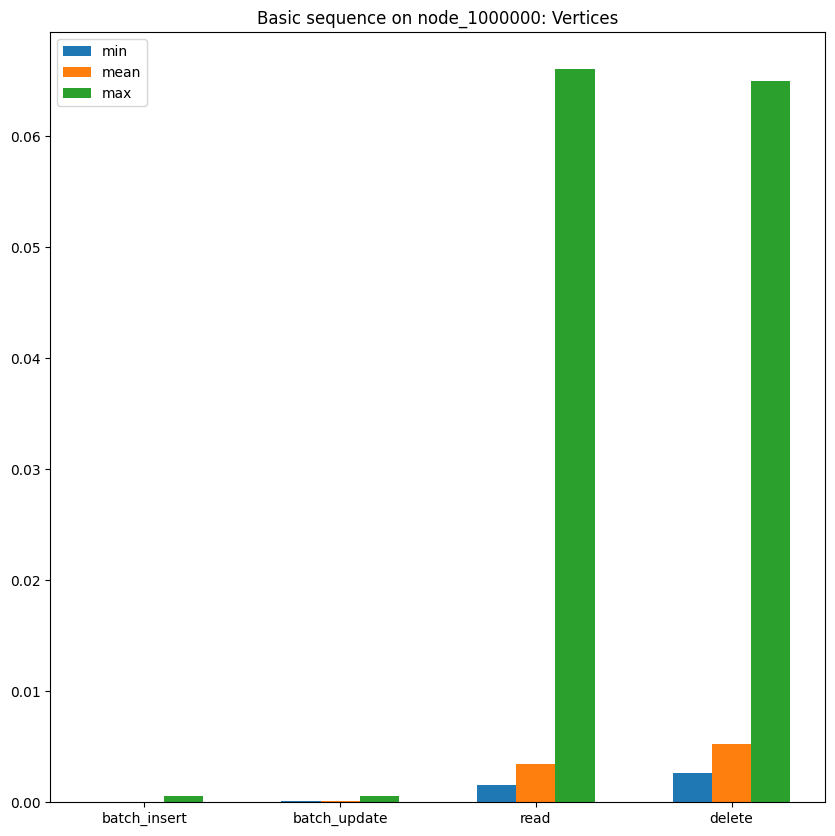

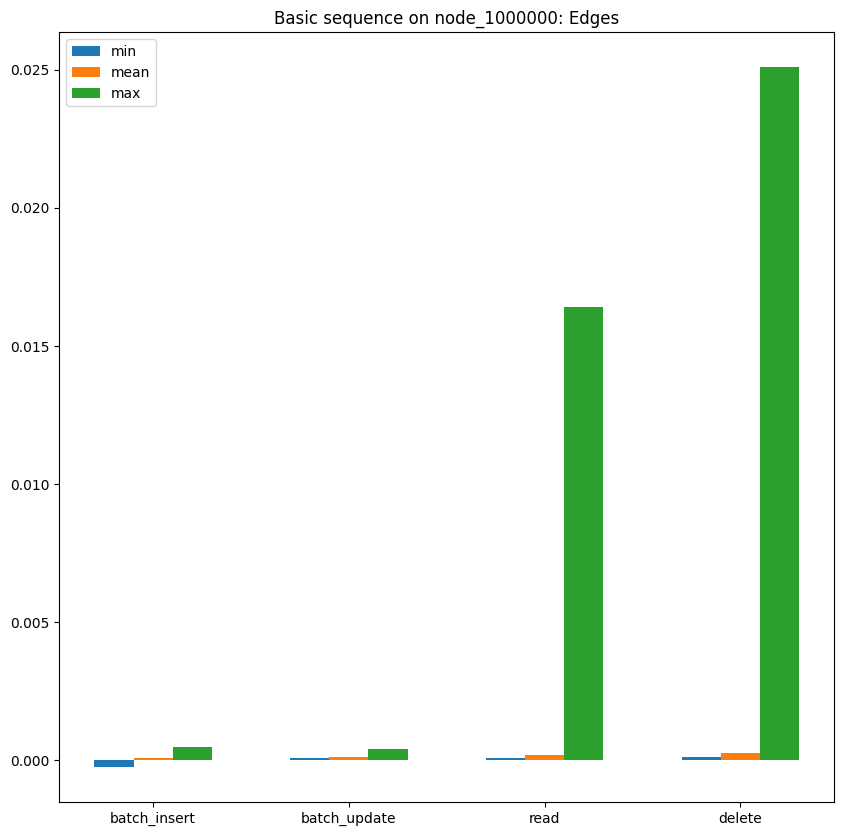

db: node_1000000
{'batch insert': {'vertices': {'min': 2.880239486694336e-05, 'max': 0.0005360960960388184, 'mean': 4.008972358703613e-05, 'total_time': 40.08972358703613}, 'edges': {'min': -0.0002518565654754639, 'max': 0.00048584890365600586, 'mean': 6.746498181864447e-05, 'total_time': 3193.440341949463}}, 'batch update': {'vertices': {'min': 8.806777000427246e-05, 'max': 0.0005835392475128174, 'mean': 0.00011791450238227845, 'total_time': 117.91450238227844}, 'edges': {'min': 6.205713748931885e-05, 'max': 0.00038756847381591795, 'mean': 0.0001076418048854704, 'total_time': 5095.201583623886}}, 'read': {'edges': {'min': 8.607435423209546e-05, 'max': 0.016418933868408203, 'mean': 0.00019232583363995885, 'total_time': 1.686889886856079}, 'vertices': {'min': 0.0015749931335449219, 'max': 0.0660548210144043, 'mean': 0.0034590744972229004, 'total_time': 0.34590744972229004}}, 'delete': {'edges': {'min': 0.00010177393087604702, 'max': 0.025091350078582764, 'mean': 0.00024673418180476983, 

In [5]:
results = {}
results["node_1000000"] = execute_database("node_1000000", large=True, config=True)
print("db:", "node_1000000")
print(results["node_1000000"])


In [6]:
def execute_traverser(database, source, target, config=True):
    
    from time import time

    password = database + database
    driver = GraphDatabase.driver(uri, auth=(username, password))


    if config:
        with driver.session() as session:
            # session.run("CREATE FULLTEXT INDEX PersonName FOR (n:Person) ON EACH [n.name]")
            session.run("CREATE CONSTRAINT name_unique FOR (n:Person) REQUIRE n.name IS UNIQUE")

    password = database + database
    driver = GraphDatabase.driver(uri, auth=(username, password))

    time_before = time()
    result = traversers.shortest_path(source, target, driver)
    time_after = time()
    return (time_after-time_before, result)

In [5]:
uri = "bolt://localhost:7690"

In [13]:
print(execute_traverser("node_10", source=1, target=4, config=False))

(0.013847112655639648, [<Record nodes(p)=[<Node element_id='4:03cb4db5-6c5d-4a70-a9b3-7e948af5ad4f:0' labels=frozenset({'Person'}) properties={'name': '1', 'age': '66'}>, <Node element_id='4:03cb4db5-6c5d-4a70-a9b3-7e948af5ad4f:8' labels=frozenset({'Person'}) properties={'name': '9', 'age': '52'}>, <Node element_id='4:03cb4db5-6c5d-4a70-a9b3-7e948af5ad4f:3' labels=frozenset({'Person'}) properties={'name': '4', 'age': '80'}>]>])


In [14]:
uri = "bolt://localhost:7687"

In [15]:
print(execute_traverser("node_100", source=1, target=50, config=True))

(0.32445383071899414, [<Record nodes(p)=[<Node element_id='4:d2ca49c3-d079-4af9-aaf4-982dd2f323da:4' labels=frozenset({'Person'}) properties={'name': '1', 'age': '39'}>, <Node element_id='4:d2ca49c3-d079-4af9-aaf4-982dd2f323da:118' labels=frozenset({'Person'}) properties={'name': '85', 'age': '60'}>, <Node element_id='4:d2ca49c3-d079-4af9-aaf4-982dd2f323da:42' labels=frozenset({'Person'}) properties={'name': '50', 'age': '100'}>]>])


In [29]:
print(execute_traverser("node_1000", source=1, target=1000, config=False))

(0.3663370609283447, [<Record nodes(p)=[<Node element_id='4:de10e9d4-9858-4ea4-b596-e4c9763a4d2b:1' labels=frozenset({'Person'}) properties={'name': '1', 'age': '29'}>, <Node element_id='4:de10e9d4-9858-4ea4-b596-e4c9763a4d2b:97' labels=frozenset({'Person'}) properties={'name': '444', 'age': '41'}>, <Node element_id='4:de10e9d4-9858-4ea4-b596-e4c9763a4d2b:1020' labels=frozenset({'Person'}) properties={'name': '1000', 'age': '97'}>]>])


In [30]:
print(execute_traverser("node_10000", source=600, target=10000, config=False))

(3.131472587585449, [<Record nodes(p)=[<Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:7409' labels=frozenset({'Person'}) properties={'name': '600', 'age': '93'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:8050' labels=frozenset({'Person'}) properties={'name': '1241', 'age': '38'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:7889' labels=frozenset({'Person'}) properties={'name': '1080', 'age': '27'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:8736' labels=frozenset({'Person'}) properties={'name': '1927', 'age': '62'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:6808' labels=frozenset({'Person'}) properties={'name': '10000', 'age': '9'}>]>])


In [31]:
print(execute_traverser("node_10000", source=600, target=10000, config=False))

(0.2305285930633545, [<Record nodes(p)=[<Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:7409' labels=frozenset({'Person'}) properties={'name': '600', 'age': '93'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:8050' labels=frozenset({'Person'}) properties={'name': '1241', 'age': '38'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:7889' labels=frozenset({'Person'}) properties={'name': '1080', 'age': '27'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:8736' labels=frozenset({'Person'}) properties={'name': '1927', 'age': '62'}>, <Node element_id='4:fc211749-54b8-4c95-838d-33ed2549f693:6808' labels=frozenset({'Person'}) properties={'name': '10000', 'age': '9'}>]>])


In [33]:
print(execute_traverser("node_100000", source=600, target=100000, config=False))

(0.4100186824798584, [<Record nodes(p)=[<Node element_id='4:809870be-9d90-4687-8a8f-9347414b7929:599' labels=frozenset({'Person'}) properties={'name': '600', 'age': '58'}>, <Node element_id='4:809870be-9d90-4687-8a8f-9347414b7929:35007' labels=frozenset({'Person'}) properties={'name': '35008', 'age': '61'}>, <Node element_id='4:809870be-9d90-4687-8a8f-9347414b7929:23600' labels=frozenset({'Person'}) properties={'name': '23601', 'age': '44'}>, <Node element_id='4:809870be-9d90-4687-8a8f-9347414b7929:17027' labels=frozenset({'Person'}) properties={'name': '17028', 'age': '61'}>, <Node element_id='4:809870be-9d90-4687-8a8f-9347414b7929:99999' labels=frozenset({'Person'}) properties={'name': '100000', 'age': '8'}>]>])


In [8]:
print(execute_traverser("node_1000000", source=600, target=132435, config=False))

(0.2019941806793213, [<Record nodes(p)=[<Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:599' labels=frozenset({'Person'}) properties={'name': '600', 'age': '47'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:24404' labels=frozenset({'Person'}) properties={'name': '24405', 'age': '34'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:175332' labels=frozenset({'Person'}) properties={'name': '175333', 'age': '60'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:256279' labels=frozenset({'Person'}) properties={'name': '256280', 'age': '59'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:132434' labels=frozenset({'Person'}) properties={'name': '132435', 'age': '69'}>]>])


In [15]:
print(execute_traverser("node_1000000", source=600, target=132435, config=False))

(0.014166831970214844, [<Record nodes(p)=[<Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:599' labels=frozenset({'Person'}) properties={'name': '600', 'age': '47'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:24404' labels=frozenset({'Person'}) properties={'name': '24405', 'age': '34'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:175332' labels=frozenset({'Person'}) properties={'name': '175333', 'age': '60'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:256279' labels=frozenset({'Person'}) properties={'name': '256280', 'age': '59'}>, <Node element_id='4:f31eefbe-8731-430a-951c-cf2d9820edc2:132434' labels=frozenset({'Person'}) properties={'name': '132435', 'age': '69'}>]>])
